# Especialização em Ciência de Dados
## Módulo de Machine Learning I

### Sumário

- 1) Regressão Logística
- 2) Árvores de Decisão

--------

In [95]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sn # para visualização dos resultados

### Nosso Problema

Neste problema, desejamos descobrir se um aluno será admitido ou não no processo seletivo de vestibular da Unifacisa com base no seu histórico escolar. 

Os dados históricos disponíveis sobre os alunos são:

- enem: Nota do candidato no Exame Nacional do Ensino Médio
- cra: Coeficiente de rendimento acadêmico proveniente da escola de origem
- tempo_experiencia: Tempo de experiência em projetos extra-acadêmicos ou voluntariado
- aprovado: Representa a admissão **(1)** ou não **(0)** do aluno pela universidade

In [96]:
# Criação dos dados e transformação do dataset de Python em um data frame

candidatos = {'enem': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'cra': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'tempo_experiencia': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'aprovado': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

candidatos_df = pd.DataFrame(candidatos,columns= ['enem', 'cra','tempo_experiencia','aprovado'])
print (candidatos_df)

    enem  cra  tempo_experiencia  aprovado
0    780  4.0                  3         1
1    750  3.9                  4         1
2    690  3.3                  3         1
3    710  3.7                  5         1
4    680  3.9                  4         1
5    730  3.7                  6         1
6    690  2.3                  1         0
7    720  3.3                  4         1
8    740  3.3                  5         1
9    690  1.7                  1         0
10   610  2.7                  3         0
11   690  3.7                  5         1
12   710  3.7                  6         1
13   680  3.3                  4         1
14   770  3.3                  3         1
15   610  3.0                  1         0
16   580  2.7                  4         0
17   650  3.7                  6         1
18   540  2.7                  2         0
19   590  2.3                  3         0
20   620  3.3                  2         0
21   600  2.0                  1         0
22   550  2

### 1 - Regressão Logística

A **Regressão Logística** é o algoritmo utilizado para quando, a partir de um conjunto de observações, desejamos prever valores assumidos por uma variável categórica binária (0 ou 1).

*"Ao invés de prever exatamente 0 ou 1, a Regressão Logística gera a probabilidade - valor entre 0 e 1. Por exemplo, considere um modelo de regressão logística para detecção de spam. Se o modelo infere um valor de 0.932 para uma mensagem de email, isso implica numa chance de 93.2% de que esta mesma mensagem seja spam"*. 


Veja mais [aqui](https://developers.google.com/machine-learning/crash-course/logistic-regression/video-lecture).

Nos dados vistos acima, vimos que existem **2** resultados possíveis esperados: *ser aceito (1)* ou *não ser aceito (0)*.


Na Regressão Logística é importante ter em mente alguns pontos:

- A Regressão Logística **Binária** requer que a variável alvo/prevista seja binária
- A depender da biblioteca utilizada, o nível 1 do fator deve ser o resultado esperado
- É preciso haver independência entre as variáveis independentes/preditores
- Este tipo de modelo requer uma quantidade razoável de dados para performar bem 

O próximo passo, então, será identificar as variáveis independentes (enem, cra e tempo_experiencia) e a variável alvo (aprovado).

In [97]:
preditores = candidatos_df[['enem', 'cra','tempo_experiencia']]
alvo = candidatos_df['aprovado']

Durante o treinamento de modelos é necessário separar o conjunto de dados de maneira a que consigamos treinar o modelo e também avaliá-lo.

**Conjunto de Treino**: Amostra dos dados utilizada para o aprendizado/construção do modelo.

**Dados de Validação**: Amostra dos dados utilizada para a tunagem dos hiperparâmetros do modelo (ou seja, sua arquitetura). Durante o ajuste dos parâmetros do modelo, para evitar *overfitting*, este conjunto é necessário.

**Conjunto de Teste**: Amostra dos dados utilizada para avaliar a capacidade de predição do modelo em novos dados.

Mais sobre estes conjuntos pode ser visto [aqui](https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set), [aqui](https://www.youtube.com/watch?v=YnHv70YepZ0) ou [aqui](https://www.youtube.com/watch?v=pohax_OCUbs).

Em geral, utiliza-se uma divisão de 80%/20% ou 70%/30% para treino e teste, respectivamente. 

In [98]:
# Divisão dos conjuntos de treino e teste

preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

Em seguida, já é possível construir o modelo de Regressão Logística:

In [99]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression()

# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(preditores_treino, alvo_treino)

# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
alvo_pred = modelo_reglog.predict(preditores_teste)

Modelo treinado! E agora?

Agora é preciso avaliar o quão bem o aprendizado do modelo consegue ser generalizado para outros conjuntos de dados ainda não vistos por ele. Avaliamos o desempenho do modelo comparando os dados previstos por ele com os dados reais.

A **Matriz de Confusão** é utilizada para fornecer um panorama do desempenho do modelo. Seus quadrantes estarão exemplificados mais abaixo.

In [100]:
# Matriz de confusão
print(confusion_matrix(alvo_teste, alvo_pred))

[[5 2]
 [0 5]]


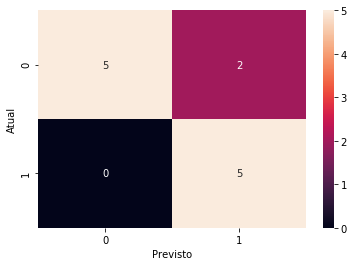

In [101]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [102]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred))

Acurácia:  0.8333333333333334


#### Interpretando a previsão


![Matriz de Confusão](imagens/confusion-matrix.png)

A partir da comparação dos valores reais dos dados e do previsto pelo modelo, é possível gerar a **Matriz de Confusão** da classificação:

```
- TP = True Positives = 5

Dos alunos previstos como aprovados pelo modelo, 5 foram realmente aprovados.

- TN = True Negatives = 5

Dos alunos previstos como reprovados pelo modelo, 5 foram realmente reprovados.

- FP = False Positives = 2

Dos alunos previstos como aprovados pelo modelo, 2 haviam sido reprovados.

- FN = False Negatives = 0

Dos alunos previstos como reprovados pelo modelo, nenhum havia sido aprovado.
```


As demais medidas avaliativas são derivadas da matriz de confusão.

![Métricas de Avaliação](imagens/metrics.png)


In [103]:
print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred))

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred))

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred))

Precisão:  0.7142857142857143
Revocação:  1.0
F1-Measure:  0.8333333333333333
ROC AUC:  0.8571428571428572


In [113]:
print(alvo_teste)
print(alvo_pred)

22    0
20    0
25    1
4     1
10    0
15    0
28    1
11    1
18    0
29    1
27    0
35    0
Name: aprovado, dtype: int64
[1 0 1 1 1 0 1 1 0 1 0 0]


Entendendo as métricas acima:

A precisão significa "Quantos elementos selecionados são relevantes?", ou seja: **Dos que meu modelo classificou como positivos, quantos realmente são positivos?**

Enquanto a revocação nos dá "Quantos elementos relevantes foram selecionados?", ou seja: **Dos realmente positivos, quantos consegui selecionar?**

Dificilmente a precisão ou revocação servirão isoladamente para avaliar a eficácia da classificação do modelo. A medida F1 é uma combinação da precisão e da revocação. 
Entretanto não há uma formula pronta para selecionar a melhor métrica de avaliação, é necessário compreender o contexto e o trade-off que cada medida traz.


In [104]:
# Só pra conferir:

# A predição foi feita para os seguintes registros:
print(preditores_teste) 

# Que possuíam a seguinte classificação:
print(alvo_teste)

# E Que obtiveram o seguinte resultado do modelo:
print(alvo_pred)

    enem  cra  tempo_experiencia
22   550  2.3                  4
20   620  3.3                  2
25   670  3.3                  6
4    680  3.9                  4
10   610  2.7                  3
15   610  3.0                  1
28   650  3.7                  6
11   690  3.7                  5
18   540  2.7                  2
29   660  3.3                  5
27   580  2.3                  2
35   650  2.3                  1
22    0
20    0
25    1
4     1
10    0
15    0
28    1
11    1
18    0
29    1
27    0
35    0
Name: aprovado, dtype: int64
[1 0 1 1 1 0 1 1 0 1 0 0]


O modelo acerta 10 das 12 observações previstas. 10/12 =~ 0.83 ou 83% de acurácia.

#### Aplicando o modelo

Treinamos o modelo para que previsse a aceitação ou não de alunos na universidade com base no seu histórico. Utilizando dados de novos alunos aplicantes, podemos prever se estes alunos serão admitidos:

In [105]:
dados2 = {'enem': [590,740,680,610,710],
                  'cra': [2,3.7,3.3,2.3,3],
                  'tempo_experiencia': [3,4,6,1,5]
                  }

novas_aplicacoes = pd.DataFrame(dados2, columns= ['enem', 'cra','tempo_experiencia'])

In [106]:
# Utilização do modelo anteriormente treinado (modelo_reglog) para prever novas inscrições de candidatos
novos_resultados = modelo_reglog.predict(novas_aplicacoes)

print(novas_aplicacoes)
print(novos_resultados)

   enem  cra  tempo_experiencia
0   590  2.0                  3
1   740  3.7                  4
2   680  3.3                  6
3   610  2.3                  1
4   710  3.0                  5
[0 1 1 0 1]


Assim, segundo o modelo treinado: dos 5 novos alunos que aplicaram 3 conseguirão passar no processo seletivo com base no seu histórico escolar.

### 2 - Árvore de Decisão

**Árvores de Decisão** são algoritmos utilizados no contexto de tarefas de classificação (podendo também ser utilizadas para regressão). Diferente de muitos outros algoritmos, uma das vantagens de utilizar este algoritmo é a interpretabilidade e transparência fornecidos pela própria estrutura da árvore - já que nos nós conseguimos ver os critérios de decisão utilizados para ramificação. 

Por exemplo: 

![Is a person fit?](imagens/fit.png)



Mais sobre Árvores de Decisão pode ser lido [aqui](https://www.datacamp.com/community/tutorials/decision-tree-classification-python), [aqui](http://dcm.ffclrp.usp.br/~augusto/publications/2003-sistemas-inteligentes-cap5.pdf) ou [aqui](https://www.youtube.com/watch?v=PCTEn3hWDxA).


##### Vamos aplicar?

Neste caso, iremos utilizar os mesmos dados do exemplo anterior para fins de comparação dos modelos treinados. Para comparar modelos corretamente, é preciso que seu treinamento seja realizado com os mesmos conjuntos de treino e teste.

Note que durante esse passo, no exemplo acima, existe um fator aleatório: é feita uma amostragem no dado original para compor tanto o conjunto de treino com o conjunto de teste.

Relembrando os conjuntos de treino e teste:

In [107]:
print("Preditores Treino")
print(preditores_treino)

print("Preditores Teste")
print(preditores_teste)

print("Alvo Treino")
print(alvo_treino)

print("Alvo Teste")
print(alvo_teste)

Preditores Treino
    enem  cra  tempo_experiencia
37   580  3.3                  1
2    690  3.3                  3
39   690  3.7                  5
30   640  3.0                  1
34   680  3.3                  5
16   580  2.7                  4
36   670  2.7                  2
8    740  3.3                  5
13   680  3.3                  4
5    730  3.7                  6
17   650  3.7                  6
14   770  3.3                  3
33   660  3.3                  6
7    720  3.3                  4
32   660  4.0                  4
1    750  3.9                  4
26   660  3.7                  4
12   710  3.7                  6
31   620  2.7                  2
24   570  3.0                  2
6    690  2.3                  1
23   550  2.7                  1
21   600  2.0                  1
19   590  2.3                  3
9    690  1.7                  1
38   590  1.7                  4
3    710  3.7                  5
0    780  4.0                  3
Preditores Teste
    enem

Com isso, já conseguimos construir a árvore:

In [108]:
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino, alvo_treino)

In [109]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(preditores_teste)

Treinado o modelo e feita a predição no conjunto de teste, nos resta saber o quão acurada foi a previsão do nosso modelo de árvore.

Para isso, usaremos as mesmas métricas utilizadas anteriormente.

In [110]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, arvore_previsao))

print('Precisão: ', metrics.precision_score(alvo_teste, arvore_previsao))

print('Revocação: ', metrics.recall_score(alvo_teste, arvore_previsao))

print('F1-Measure: ', metrics.f1_score(alvo_teste, arvore_previsao))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, arvore_previsao))

Acurácia:  0.9166666666666666
Precisão:  0.8333333333333334
Revocação:  1.0
F1-Measure:  0.9090909090909091
ROC AUC:  0.9285714285714286


[[6 1]
 [0 5]]


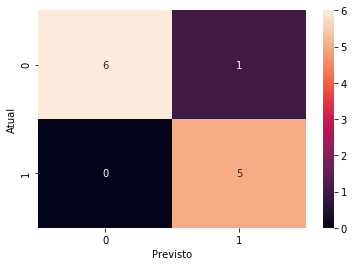

In [111]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, arvore_previsao))


matriz_confusao_arvore = pd.crosstab(alvo_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)

### Para refletir?


- O que pode ter acontecido com a árvore?
- Qual dos modelos é mais eficaz?
- É possível melhorar a classificação?

-----

In [112]:
#- Experimentação com regressão logística
#- Interpretação de resultados, modelo e predição
#- Avaliação e comparação de modelos


## Comentários e outros códigos

# Como selecionar variáveis?

# variaveis_desejadas = ['nome', 'idade', 'peso', 'altura']
# X = dataset_original[variaveis_desejadas] # Features
# y = pima.label # Target variable